# Лабораторная 5. Проверка гипотез (параметрических и непараметрической) по выборке из нормального закона распределения.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from random import randint
%matplotlib inline

## 1. сгенерировать выборки (различного объема) из нормальной генеральной совокупности с параметрами (№PC, SQRT(№PC))

In [2]:
M = [0.0,7.,14.]
S = [np.sqrt(28.),np.sqrt(2.)]
N =[20,30,80,100,1000,10000,100000]
z = [[m,s,n,'N~(' + str(m) + ';' + str(s) + ')' + '\n Count of samples:' + str(n),np.random.normal(m,s,n)] for m in M for s in S  for n in N ]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


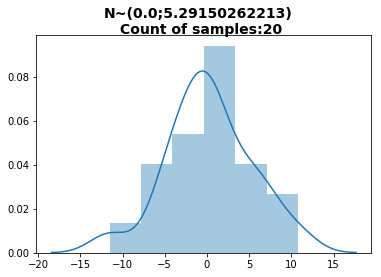

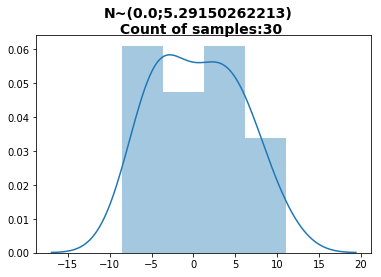

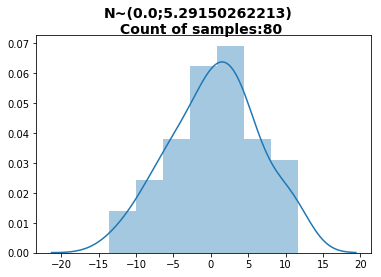

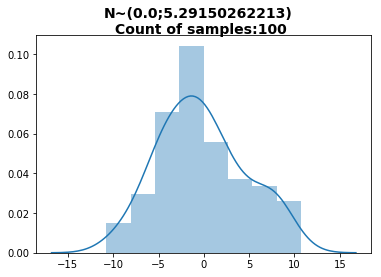

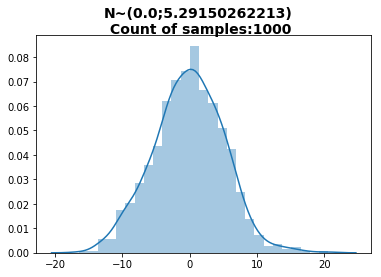

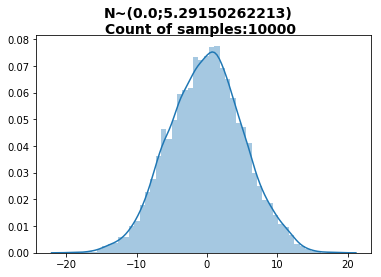

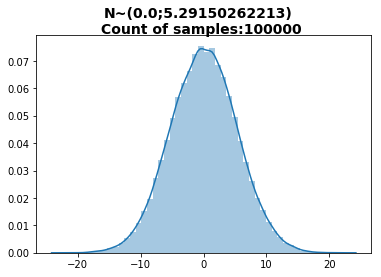

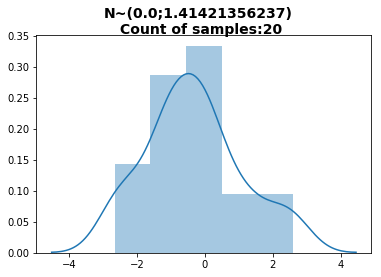

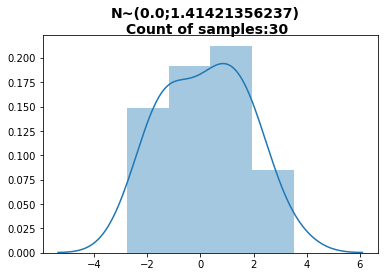

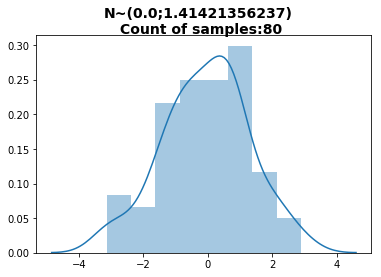

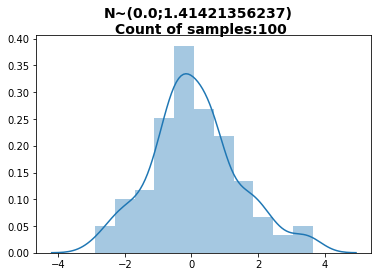

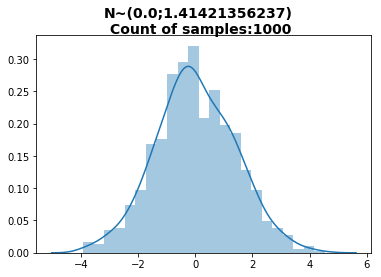

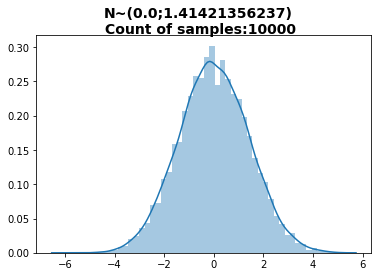

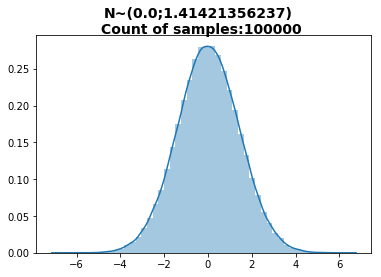

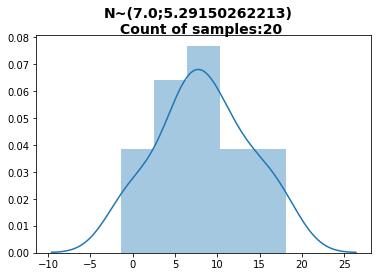

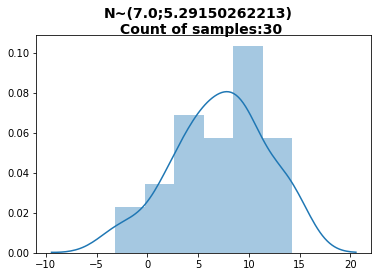

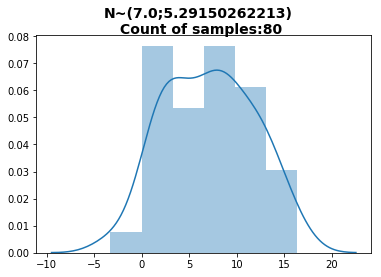

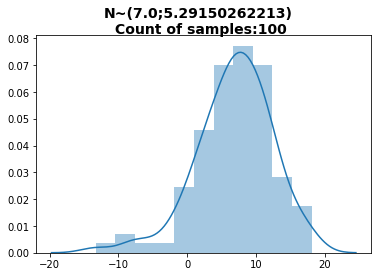

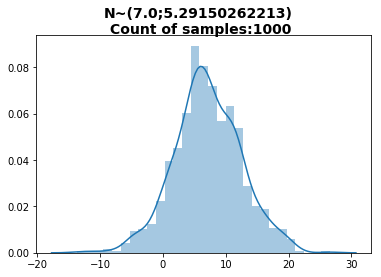

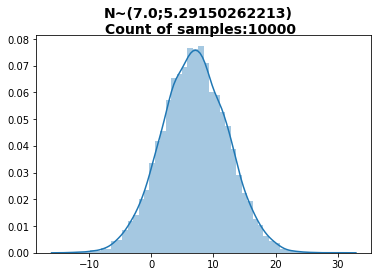

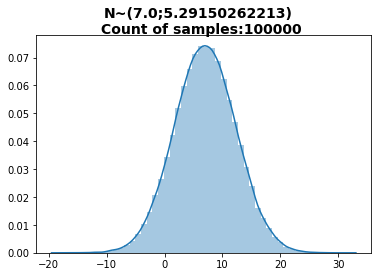

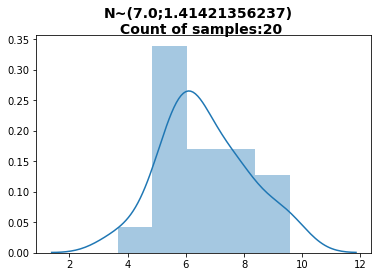

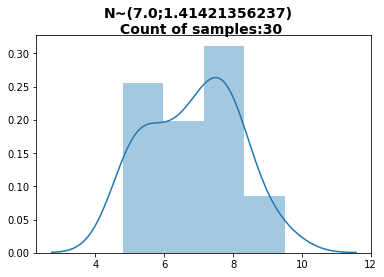

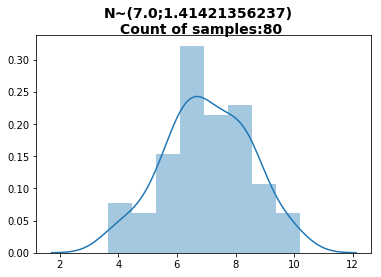

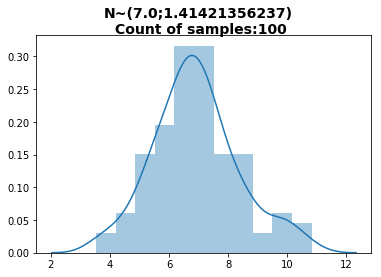

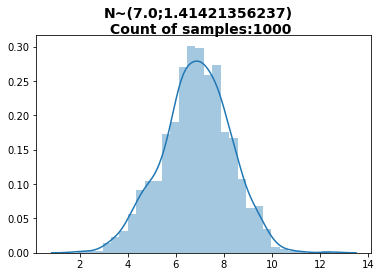

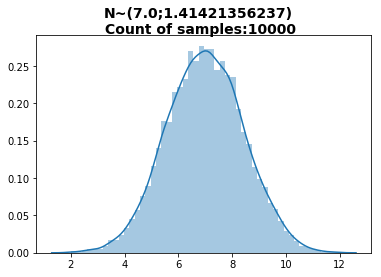

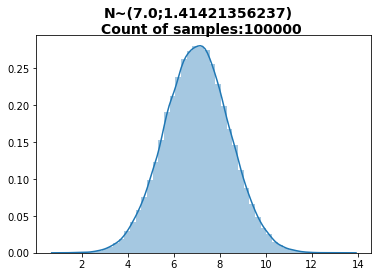

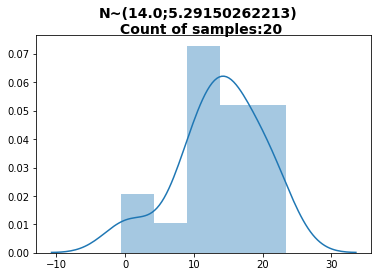

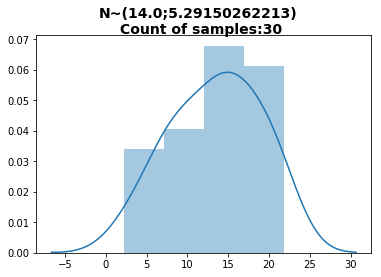

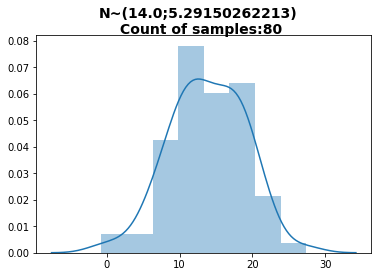

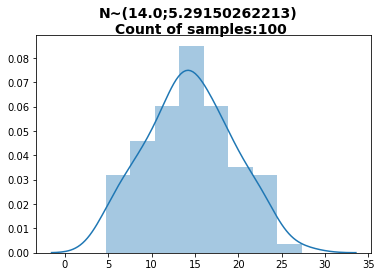

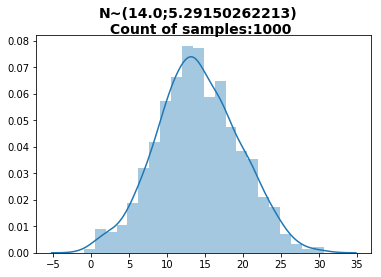

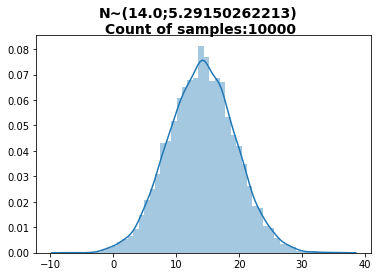

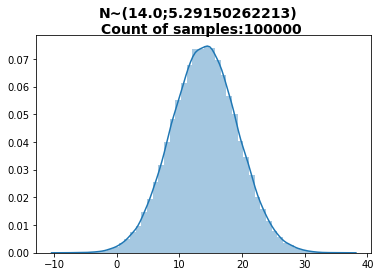

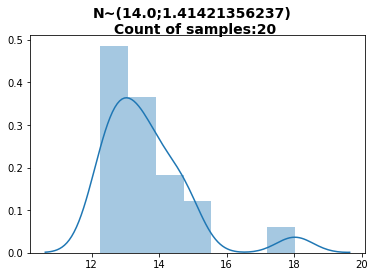

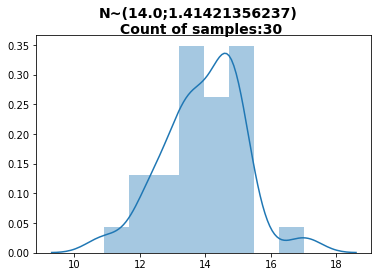

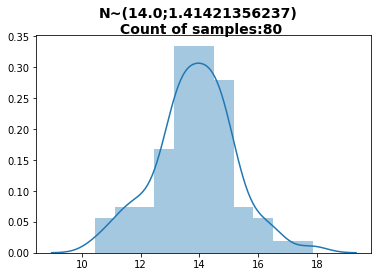

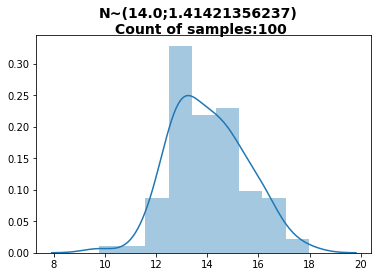

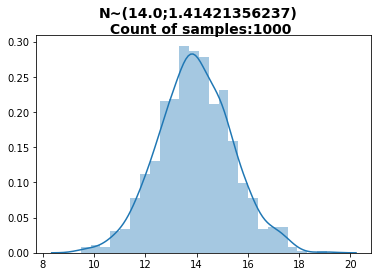

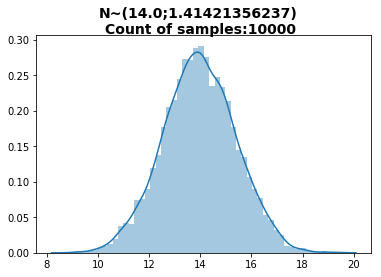

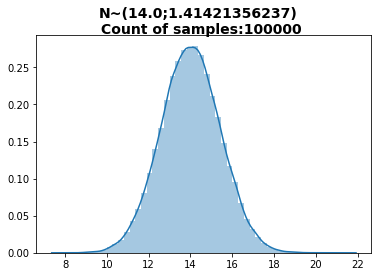

In [3]:
for t in z:
    fig = plt.figure()
    fig.suptitle(t[3], fontsize=14, fontweight='bold')
    sns.distplot(t[4:])

## 2. Провести статистический анализ этих выборок. Найти точечные и интервальные оценки различных числовых характеристик для каждой из  выборок. Проверить гипотезы о параметрах генеральной совокупности.

### Математическое ожидание выборок

## 3. Проверить гипотезы о виде закона распределения генеральной совокупности.

In [24]:
def ChiSquareNormalityTest(ar,n,M,D):
    ar.sort()
    Norm = stat.norm(loc = M, scale= D) #stat.chi2(8)
    N = len(ar)
    v = np.split(ar,n)
    Tprob1 = [Norm.cdf(t[-1]) for t in v]
    Tprob =[0]*len(Tprob1)
    Tprob[0] = Tprob1[0]
    for i in range(1,len(Tprob)):
        Tprob[i] = Tprob1[i]-Tprob1[i-1]
    Rprob = [len(t)/N for t in v]
    answer = 0
    for i in range(len(Tprob)):
        answer = answer +  ((Rprob[i]-Tprob[i])**2)/Tprob[i]
    return N * answer

In [25]:
a = 0.2 # вероятность нахождения в доверитеьном интервале
for t in z:
    M = np.mean(t[4])
    D = np.var(t[4])
    n = len(t[4])
    print('Sample count:' + str(t[2]))
    print('Real M: ' + str(t[0]))
    print('Real D: ' + str(t[1]**2))
    print('calculated M: ' + str(M))
    print('calculated D: ' + str(D))
    M_delta = stat.norm.ppf((a+1)/2)*D/np.sqrt(n)
    print('M in range ['+str(M-M_delta)+';'+str(M+M_delta)+']')
    D_min = (n-1)*D/stat.chi2.ppf(q = (1+a)/2,df = n-1) 
    D_max = (n-1)*D/stat.chi2.ppf(q = (1-a)/2,df = n-1) 
    print('D in range ['+str(D_min)+';'+str(D_max)+']')
    print('Chi2 a-value =',1-stat.chi2.cdf(x = ChiSquareNormalityTest(t[4],max(len(t[4])/40,2),M,np.sqrt(D)),df = len(t[4])+1),'\n')

Sample count:20
Real M: 0.0
Real D: 28.0
calculated M: 0.274754253837
calculated D: 24.6437251211
M in range [-1.12131608766;1.67082459533]
D in range [23.517132134;27.7874626764]
Chi2 a-value = 1.0 

Sample count:30
Real M: 0.0
Real D: 28.0
calculated M: 0.479101670376
calculated D: 26.2239630606
M in range [-0.733878328914;1.69208166967]
D in range [25.1133171254;28.7248750407]
Chi2 a-value = 1.0 

Sample count:80
Real M: 0.0
Real D: 28.0
calculated M: 0.536599485833
calculated D: 34.1746353735
M in range [-0.431399358536;1.5045983302]
D in range [33.1076176081;35.8976623033]
Chi2 a-value = 1.0 

Sample count:100
Real M: 0.0
Real D: 28.0
calculated M: -0.212445301284
calculated D: 22.6463636485
M in range [-0.786184363975;0.361293761407]
D in range [21.9958372203;23.6432278435]
Chi2 a-value = 1.0 

Sample count:1000
Real M: 0.0
Real D: 28.0
calculated M: -0.166984575458
calculated D: 27.4053803583
M in range [-0.386543844765;0.0525746938486]
D in range [27.1150621267;27.7369968975]
C

Chi2 a-value = 1.0 



Wall time: 4.26 s


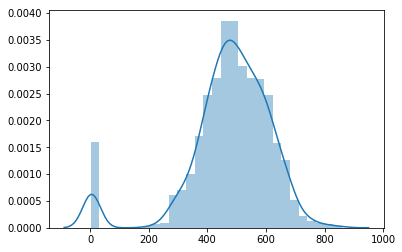

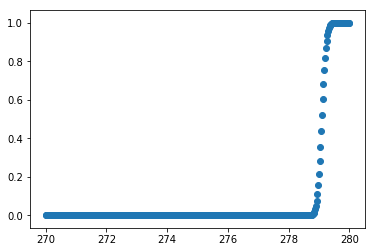

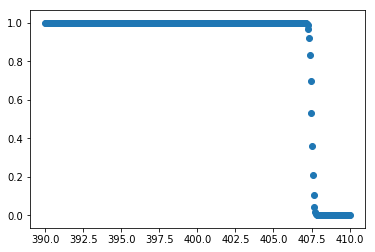

In [17]:
%%time
l = np.concatenate( [np.random.randint(low = 1,high =10,size = 50),np.random.normal(loc = 500,scale = 100,size = 1000)])
sns.distplot(l)
m = np.linspace(270,280,400)
res = []
for M in m:
    res.append(1-stat.chi2.cdf(x = ChiSquareNormalityTest(l,50,M,100) , df = len(t[4])))
plt.figure()
plt.scatter(m,res)
m = np.linspace(390,410,400)
res = []
for M in m:
    res.append(1-stat.chi2.cdf(x = ChiSquareNormalityTest(l,50,M,100) , df = len(t[4])))
plt.figure()
plt.scatter(m,res)